### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
csv_path = "/Users/ecem/Desktop/csv of scgs"
wavelet_csv = "/Users/ecem/Desktop/wavelet-csv"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
spec = pd.read_csv(csv_path + '/p-value-selected-intersection-four-dis-spec.csv', index_col = 0)
#spec  #uncomment to see dataframe

signal_proc = pd.read_csv(csv_path + '/four-disease-final-signal_processing.csv', index_col = 0)

zero_crossing = signal_proc.iloc[:,:21]
#zero_crossing #uncomment to see dataframe

tempogram = pd.read_csv(csv_path + '/p-value-selected-four-dis-union-temp.csv', index_col = 0)
#tempogram #uncomment to see dataframe

chromogram = pd.read_csv(csv_path + '/p-value-selected-four-dis-union-chromogram.csv', index_col = 0)
#chromogram #uncomment to see dataframe

w_lvl0 = pd.read_csv(csv_path + '/four-disease-wavelet-lvl0-coef.csv', index_col = 0)
w_lvl0 = w_lvl0.reset_index(drop=True)
#w_lvl0  #uncomment to see dataframe

#wavelet =pd.read_csv(csv_path + '/p-value-selected-four-disease-mean-wavelet.csv', index_col = 0)

This line will be used to encode the target value. It is not going to be used for other purposes.

In [4]:
features = pd.concat([spec, w_lvl0], axis = 1)
features = pd.concat([features, zero_crossing], axis = 1)
features = pd.concat([features, chromogram], axis = 1)
features = pd.concat([features, tempogram], axis = 1)
#features = pd.concat([features, wavelet], axis = 1)

features

,freq_x1772,freq_y1773,freq_x1774,freq_y1774,freq_z554,freq_x555,freq_y555,freq_z555,freq_x556,freq_y556,...,tempogram_z106,tempogram_y112,tempogram_x116,tempogram_y207.1,tempogram_y227.1,tempogram_z246,tempogram_z253,tempogram_y353,tempogram_y370,tempogram_z374.1
0,0.001502,0.001610,0.001665,0.001679,0.001870,0.001893,0.001943,0.002011,0.002095,0.002203,...,6.188482e-17,4.392747e-17,6.259715e-17,-1.069911e-17,2.095696e-17,2.819607e-17,3.085184e-17,-3.298231e-17,-6.092841e-17,6.587582e-17
1,0.001071,0.001127,0.001137,0.001143,0.002001,0.001956,0.001950,0.001976,0.002043,0.002175,...,7.854615e-17,6.697528e-17,5.360961e-17,2.488668e-17,3.004509e-17,2.438228e-17,1.938164e-17,-1.824835e-17,-1.761129e-17,8.780803e-17
2,0.000985,0.001006,0.001021,0.001047,0.001530,0.001647,0.001771,0.001908,0.002053,0.002199,...,7.413183e-17,8.240297e-17,1.104261e-16,-2.567838e-17,1.563737e-17,8.424135e-18,2.059647e-17,-2.634202e-17,-3.694215e-17,8.083090e-17
3,0.001602,0.001491,0.001513,0.001518,0.001743,0.001808,0.001872,0.001936,0.002013,0.002083,...,4.562239e-17,4.845129e-17,4.446707e-17,-1.746719e-17,3.423315e-17,2.515351e-17,3.396500e-17,-3.469689e-17,-5.534130e-17,5.987236e-17
4,0.001523,0.001262,0.001153,0.001125,0.002226,0.002248,0.002256,0.002248,0.002224,0.002187,...,5.325780e-17,4.363806e-17,6.760344e-17,-3.850100e-18,3.678609e-17,5.717957e-17,4.738689e-17,-2.646103e-17,-7.969818e-17,7.040047e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.000993,0.000940,0.000907,0.000890,0.000969,0.000953,0.000937,0.000914,0.000884,0.000848,...,5.347619e-17,7.485152e-17,8.153491e-17,-2.536445e-17,3.978511e-17,1.585965e-17,3.749178e-17,-3.705698e-17,-4.015822e-17,8.053797e-17
2388,0.000910,0.000878,0.000859,0.000849,0.000505,0.000532,0.000565,0.000599,0.000631,0.000658,...,5.171603e-17,6.871221e-17,4.617422e-17,-7.386951e-18,1.275095e-17,4.639175e-18,1.454632e-17,-1.868168e-17,-5.845148e-17,6.055644e-17
2389,0.000819,0.000744,0.000698,0.000681,0.000569,0.000544,0.000520,0.000502,0.000494,0.000496,...,5.518599e-17,9.277249e-17,6.856196e-17,1.090012e-17,2.964599e-17,5.220887e-17,4.991874e-17,-6.193681e-18,-2.759506e-17,7.286572e-17
2390,0.000812,0.000775,0.000785,0.000793,0.000720,0.000715,0.000708,0.000698,0.000686,0.000672,...,6.102847e-17,1.030882e-16,8.559952e-17,-1.899359e-17,1.097362e-17,1.122472e-17,6.336264e-18,2.768657e-18,-4.164722e-17,8.645078e-17


In [5]:
y = np.load(csv_path + "/four-disease-as-binary.npy")

## With threshold

In [6]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(features)
masked = vt.get_support()
features_masked = features.loc[:, masked]
features_masked # uncomment to see the dataframe

,freq_y1926,freq_z1926,freq_x1939,freq_y1939,freq_x1927,freq_y1927,freq_z563,freq_x564,freq_y564,freq_z564,...,A_x.1,A_y,A_z,A♯_y,A♯_z,B_x,B_y,B_z,tempogram_y256,tempogram_z256
0,0.002582,0.002497,0.004506,0.004543,0.002424,0.002366,0.001862,0.001916,0.001992,0.002066,...,0.544785,0.482642,0.468954,0.741580,0.855271,0.983741,1.000000,1.000000,0.530600,0.478565
1,0.003133,0.002897,0.004208,0.004400,0.002712,0.002609,0.002457,0.002558,0.002656,0.002732,...,0.601679,0.559608,0.518900,0.768403,0.938481,1.000000,0.980735,0.981522,0.500824,0.502186
2,0.002479,0.002414,0.004920,0.005216,0.002365,0.002328,0.002619,0.002633,0.002617,0.002569,...,0.524400,0.476397,0.448132,0.681753,0.913051,1.000000,0.968087,1.000000,0.625713,0.628625
3,0.002324,0.002438,0.004866,0.005091,0.002572,0.002719,0.002833,0.002833,0.002798,0.002727,...,0.535861,0.476171,0.485026,0.714123,0.848634,0.983572,0.940034,1.000000,0.529697,0.512323
4,0.002514,0.002391,0.004548,0.004506,0.002288,0.002205,0.002131,0.002139,0.002177,0.002221,...,0.405941,0.454041,0.454407,0.765874,0.837774,0.954781,0.869775,0.999276,0.598515,0.594308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.001407,0.001488,0.001534,0.001612,0.001567,0.001643,0.000651,0.000650,0.000644,0.000634,...,0.647699,0.509018,0.532665,0.745018,0.735538,1.000000,0.975160,0.984908,0.662011,0.647993
2388,0.001265,0.001371,0.001810,0.001918,0.001491,0.001611,0.000534,0.000546,0.000560,0.000577,...,0.487809,0.477325,0.537382,0.601511,0.753724,0.964518,1.000000,0.966602,0.495928,0.466804
2389,0.001279,0.001338,0.001665,0.001748,0.001414,0.001497,0.000784,0.000792,0.000800,0.000803,...,0.490846,0.470305,0.471849,0.600722,0.668828,0.980491,1.000000,0.863238,0.553152,0.551280
2390,0.001348,0.001429,0.001432,0.001493,0.001501,0.001561,0.000562,0.000551,0.000538,0.000527,...,0.496267,0.549003,0.620214,0.586552,0.617611,0.952005,1.000000,0.770166,0.492979,0.483272


In [7]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [8]:
import xgboost as xgb
classifier = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf = Pipeline([('classify', classifier)])


In [9]:
clf.fit(X_train_, y_train_)


Pipeline(steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None, ...)))])

In [10]:
yhat = clf.predict(X_valid_)

In [11]:
df_results_test = pd.DataFrame({'AR': y_valid_[:,0], 'AS': y_valid_[:,1], 'MR': y_valid_[:,2], 'MS': y_valid_[:,3],
                        'predicted AR': yhat[:,0],
                          'predicted AS': yhat[:,1],
                          'predicted MR': yhat[:,2], 
                          'predicted MS': yhat[:,3]})
df_results_test

,AR,AS,MR,MS,predicted AR,predicted AS,predicted MR,predicted MS
0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0
4,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
474,1,0,1,0,1,0,1,0
475,0,0,1,0,0,0,1,0
476,0,0,0,0,0,0,0,0
477,1,0,0,0,1,0,0,0


In [12]:
auc_y1 = roc_auc_score(y_valid_[:,0],yhat[:,0])
auc_y2 = roc_auc_score(y_valid_[:,1],yhat[:,1])
auc_y3 = roc_auc_score(y_valid_[:,2],yhat[:,2])
auc_y4 = roc_auc_score(y_valid_[:,3],yhat[:,3])

print("ROC AUC AR: %.4f, AS: %.4f, MR: %.4f, MS: %.4f " % (auc_y1, auc_y2, auc_y3, auc_y4))


ROC AUC AR: 0.9279, AS: 0.9621, MR: 0.9583, MS: 0.9329 


In [13]:
weighted_roc_auc_ovo = roc_auc_score(
    y_valid_, yhat, multi_class="ovr", average="weighted"
)

In [14]:
weighted_roc_auc_ovo

0.9492099673981724

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


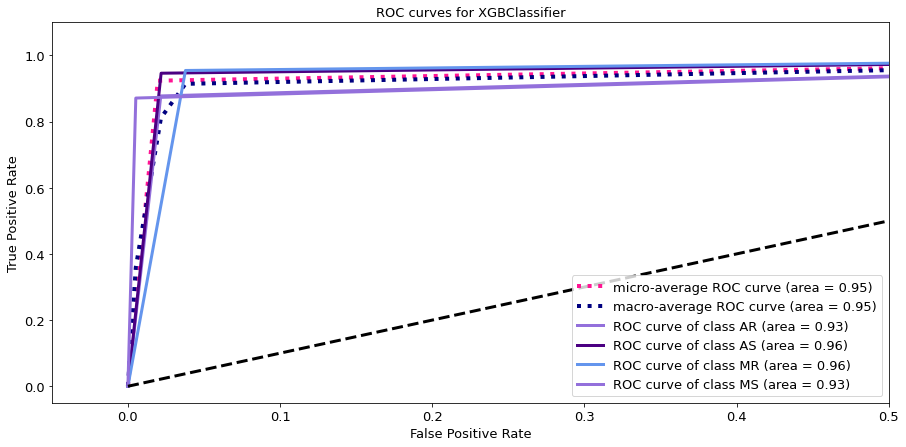

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AR", "AS", "MR", "MS"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=13)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=13)
plt.xlabel("False Positive Rate",fontsize = 13 )
plt.ylabel("True Positive Rate", fontsize = 13)
plt.title("ROC curves for XGBClassifier",fontsize = 13)
plt.legend(loc="lower right", fontsize = 13) 
plt.show()

In [17]:
cm_y1 = confusion_matrix(y_valid_[:,0],yhat[:,0])
cm_y2 = confusion_matrix(y_valid_[:,1],yhat[:,1])
cm_y3 = confusion_matrix(y_valid_[:,2],yhat[:,2])
cm_y4 = confusion_matrix(y_valid_[:,3],yhat[:,3])
print(cm_y1)



[[317   7]
 [ 19 136]]


In [18]:
class_dict = {0:'AR', 1:'AS', 2:'MR', 3:'MS'}

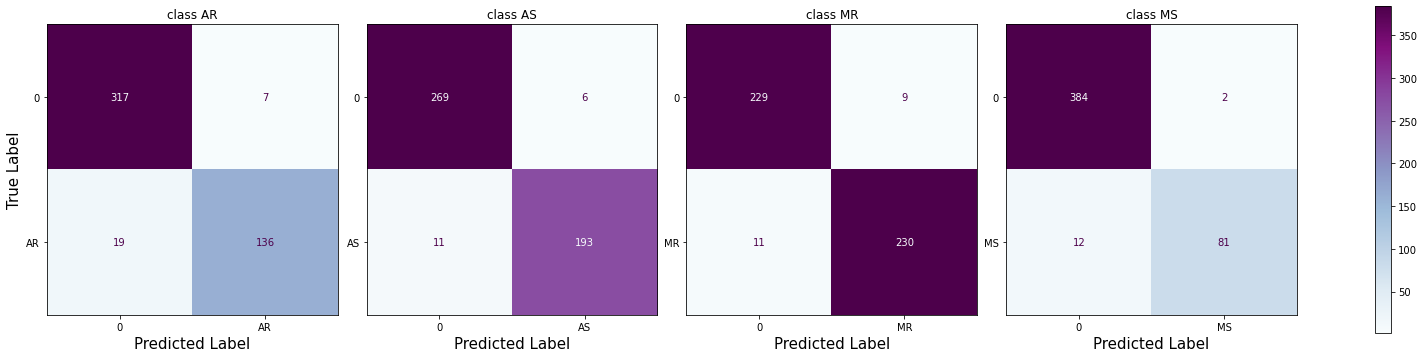

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 4, figsize=(28, 15))
axes = axes.ravel()
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_valid_[:, i],
                                                   yhat[:, i]),
                                  display_labels=[0, i])
    if i == 0:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel('True Label', fontsize = 15)
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
    else:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel(' ')
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
        

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes, shrink= 0.4)
plt.show()

In [20]:
cm_y2

array([[269,   6],
       [ 11, 193]])

In [21]:
cm_y3

array([[229,   9],
       [ 11, 230]])

In [22]:
cm_y4

array([[384,   2],
       [ 12,  81]])

In [23]:
cr_y1 = classification_report(y_valid_[:,0],yhat[:,0]) # AR
cr_y2 = classification_report(y_valid_[:,1],yhat[:,1]) # AS
cr_y3 = classification_report(y_valid_[:,2],yhat[:,2]) # MR
cr_y4 = classification_report(y_valid_[:,3],yhat[:,3]) # MS

print (cr_y1)
print (cr_y2)
print (cr_y3)
print (cr_y4)




              precision    recall  f1-score   support

           0       0.94      0.98      0.96       324
           1       0.95      0.88      0.91       155

    accuracy                           0.95       479
   macro avg       0.95      0.93      0.94       479
weighted avg       0.95      0.95      0.95       479

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       275
           1       0.97      0.95      0.96       204

    accuracy                           0.96       479
   macro avg       0.97      0.96      0.96       479
weighted avg       0.96      0.96      0.96       479

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       238
           1       0.96      0.95      0.96       241

    accuracy                           0.96       479
   macro avg       0.96      0.96      0.96       479
weighted avg       0.96      0.96      0.96       479

              preci

In [24]:
y_valid_a = pd.DataFrame(y_valid_)
y_train_a = pd.DataFrame(y_train_)

X_valid_a = pd.DataFrame(X_valid_)
X_train_a = pd.DataFrame(X_train_)

## Without threshold

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(features, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [26]:
classifier_f = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf_f = Pipeline([('classify', classifier)])

clf_f.fit(X_train, y_train)

yhat_f = clf.predict(X_valid)

In [27]:
df_results_test_f = pd.DataFrame({'AR': y_valid[:,0], 'AS': y_valid[:,1], 'MR': y_valid[:,2], 'MS': y_valid[:,3],
                        'predicted AR': yhat_f[:,0],
                          'predicted AS': yhat_f[:,1],
                          'predicted MR': yhat_f[:,2], 
                          'predicted MS': yhat_f[:,3]})
df_results_test_f

,AR,AS,MR,MS,predicted AR,predicted AS,predicted MR,predicted MS
0,0,0,1,0,0,0,1,0
1,1,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
474,1,0,1,0,1,0,1,0
475,0,0,1,0,0,0,1,0
476,0,0,0,0,0,0,0,0
477,1,0,0,0,1,0,0,0


In [28]:
auc_y1_ = roc_auc_score(y_valid[:,0],yhat_f[:,0])
auc_y2_ = roc_auc_score(y_valid[:,1],yhat_f[:,1])
auc_y3_ = roc_auc_score(y_valid[:,2],yhat_f[:,2])
auc_y4_ = roc_auc_score(y_valid[:,3],yhat_f[:,3])

print("ROC AUC AR: %.4f, AS: %.4f, MR: %.4f, MS: %.4f " % (auc_y1_, auc_y2_, auc_y3_, auc_y4_))

ROC AUC AR: 0.9454, AS: 0.9579, MR: 0.9604, MS: 0.9221 


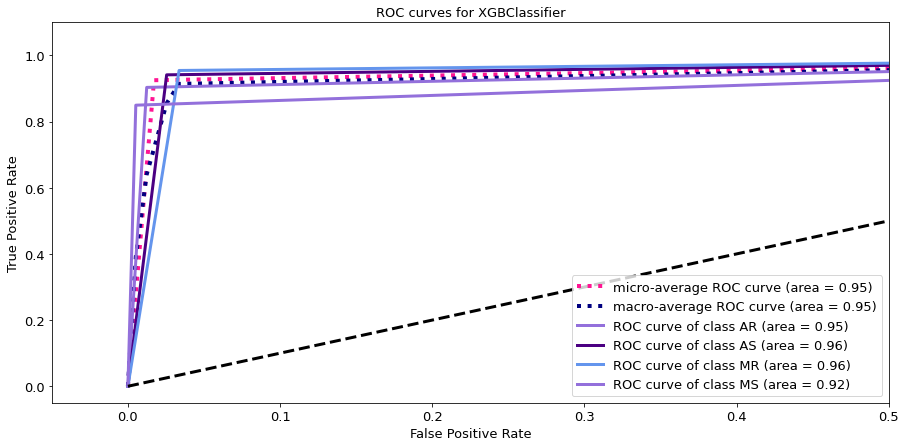

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], yhat_f[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid.ravel(), yhat_f.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AR", "AS", "MR", "MS"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=13)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=13)
plt.xlabel("False Positive Rate",fontsize = 13 )
plt.ylabel("True Positive Rate", fontsize = 13)
plt.title("ROC curves for XGBClassifier",fontsize = 13)
plt.legend(loc="lower right", fontsize = 13) 
plt.show()

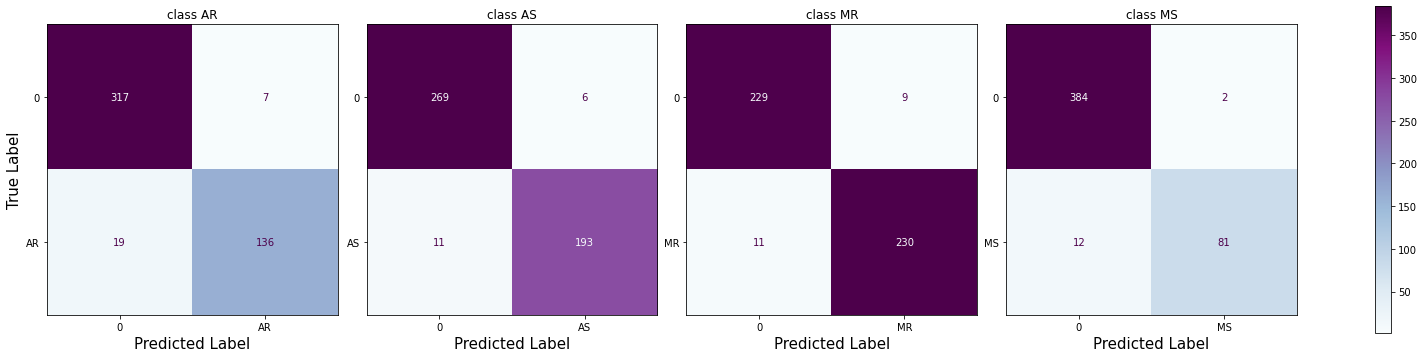

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 4, figsize=(28, 15))
axes = axes.ravel()
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_valid_[:, i],
                                                   yhat[:, i]),
                                  display_labels=[0, i])
    if i == 0:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel('True Label', fontsize = 15)
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
        
    else:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel(' ')
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
      
        

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes, shrink= 0.4)

plt.show()

In [31]:
cr_y1_ = classification_report(y_valid[:,0],yhat_f[:,0]) # AR
cr_y2_ = classification_report(y_valid[:,1],yhat_f[:,1]) # AS
cr_y3_ = classification_report(y_valid[:,2],yhat_f[:,2]) #mr
cr_y4_ = classification_report(y_valid[:,3],yhat_f[:,3]) #MS

print (cr_y1_)
print (cr_y2_)
print (cr_y3_)
print (cr_y4_)



              precision    recall  f1-score   support

           0       0.96      0.99      0.97       324
           1       0.97      0.90      0.94       155

    accuracy                           0.96       479
   macro avg       0.96      0.95      0.95       479
weighted avg       0.96      0.96      0.96       479

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       275
           1       0.96      0.94      0.95       204

    accuracy                           0.96       479
   macro avg       0.96      0.96      0.96       479
weighted avg       0.96      0.96      0.96       479

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.97      0.95      0.96       241

    accuracy                           0.96       479
   macro avg       0.96      0.96      0.96       479
weighted avg       0.96      0.96      0.96       479

              preci